## **Intelligent Road Accident Prediction System**

Road accidents are a prevalent and unfortunate occurrence that poses a significant threat to public safety.Every day, countless individuals find themselves involved in unexpected and often tragic collisions on the roads. Numerous things, such as careless driving, speeding, intoxication, bad weather, and mechanical breakdowns, can cause these collisions. Road accidents have far-reaching effects, including serious injury, fatalities, and significant property and vehicle damage. Road accidents are a pressing concern that demands collective efforts to address and mitigate their impact.

This project tries to predict severity of road accidents based on several parameters such as weather, location, etc. This would be helpful in early emergency response and infrastructure improvement.

The dataset used is the UK government amassed traffic data from 2000 and 2018, with over 1.8 million accidents recorded. It contains 33 Features covering over a 1.8million records.

In [ ]:
#DATASET LINK : https://drive.google.com/drive/folders/1AHifI9MD-eJ3Vja9q1_ZU2g65icX2gK4?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


 # Importing Modules




In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [ ]:
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set_style('whitegrid')

%matplotlib inline

In [ ]:
df = pd.read_csv(r'drive/MyDrive/roads/UK_Accident.csv', parse_dates=['Date', 'Time'])

# Exploratory Data Analysis

In [ ]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 0', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
                 'Local_Authority_(Highway)', 'LSOA_of_Accident_Location'], inplace=True)

In [ ]:
df.sample(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
47926,200506X033043,-2.27,53.58,6,1,2,1,2005-08-13,7,2023-12-13 08:22:00,101,1,66,Dual carriageway,70,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,2,Yes,2005
1013038,201150FP2H004,-3.58,50.44,50,3,1,1,2011-12-04,3,2023-12-13 19:30:00,587,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,2011
879901,2.01093E+12,-2.99,56.48,93,3,2,1,2010-02-07,6,2023-12-13 14:20:00,918,4,960,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2010
1292144,201332L493613,-0.48,53.32,32,3,1,1,2013-12-21,7,2023-12-13 18:25:00,356,5,224,Single carriageway,60,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Wet/Damp,None,None,2,Yes,2013
149407,2.01E+12,0.34,51.17,46,3,2,1,2005-03-16,4,2023-12-13 07:50:00,543,6,0,Single carriageway,60,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,2005


In [ ]:
print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 1504150
No. of cols: 28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 28 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1504150 non-null  object        
 1   Longitude                                    1504049 non-null  float64       
 2   Latitude                                     1504150 non-null  float64       
 3   Police_Force                                 1504150 non-null  int64         
 4   Accident_Severity                            1504150 non-null  int64         
 5   Number_of_Vehicles                           1504150 non-null  int64         
 6   Number_of_Casualties                         1504150 non-null  int64         
 7   Date                                         1504150 non-null  datetime64[ns]
 8   Day_of_Week                                  1504150

In [ ]:
df.isna().sum()

Accident_Index                                   0
Longitude                                      101
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                           117
Local_Authority_(District)                       0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Control                                 0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control               17
Pedestrian_Crossing-Physical_Fa

In [ ]:
df.dropna(subset=['Longitude', 'Time', 'Pedestrian_Crossing-Human_Control',
                  'Pedestrian_Crossing-Physical_Facilities'], inplace=True)

In [ ]:
dup_rows = df[df.duplicated()]
print("No. of duplicate rows: ", dup_rows.shape[0])

No. of duplicate rows:  34155


In [ ]:
df.drop_duplicates(inplace=True)
print("No. of rows remaining: ", df.shape[0])

No. of rows remaining:  1469735


In [ ]:
df.describe(include=np.number)

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00
mean,-1.43,52.58,30.78,2.84,1.83,1.35,4.12,353.52,4.09,1008.85,39.08,2.66,380.11,1.36,2009.31
std,1.40,1.45,25.51,0.40,0.72,0.83,1.92,259.24,1.43,1821.62,14.17,3.21,1300.94,0.48,3.02
min,-7.52,49.91,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,10.00,-1.00,-1.00,1.00,2005.00
25%,-2.36,51.49,7.00,3.00,1.00,1.00,2.00,122.00,3.00,0.00,30.00,-1.00,0.00,1.00,2006.00
50%,-1.39,52.28,31.00,3.00,2.00,1.00,4.00,328.00,4.00,129.00,30.00,3.00,0.00,1.00,2010.00
75%,-0.22,53.46,46.00,3.00,2.00,1.00,6.00,531.00,6.00,726.00,50.00,6.00,0.00,2.00,2012.00
max,1.76,60.76,98.00,3.00,67.00,93.00,7.00,941.00,6.00,9999.00,70.00,6.00,9999.00,3.00,2014.00


In [ ]:
df.describe(include=np.object)

,Accident_Index,Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
count,1469735,1469735,1469735,1469735,1469735,1469735,1469735,1469735,1469735,1469735,1469735
unique,927301,6,5,3,6,5,9,6,8,6,2
top,2.01E+12,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes
freq,370206,1100480,715644,1461091,1225277,1077129,1176480,1011352,1433816,1442968,1190075


In [ ]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

15

In [ ]:
categorical_data = df.select_dtypes(include='object')
cat_cols = categorical_data.columns
len(cat_cols)

11

In [ ]:
cat_cols

Index(['Accident_Index', 'Road_Type', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

It creates a boxplot grid for the numerical columns in a DataFrame using Seaborn and Matplotlib.

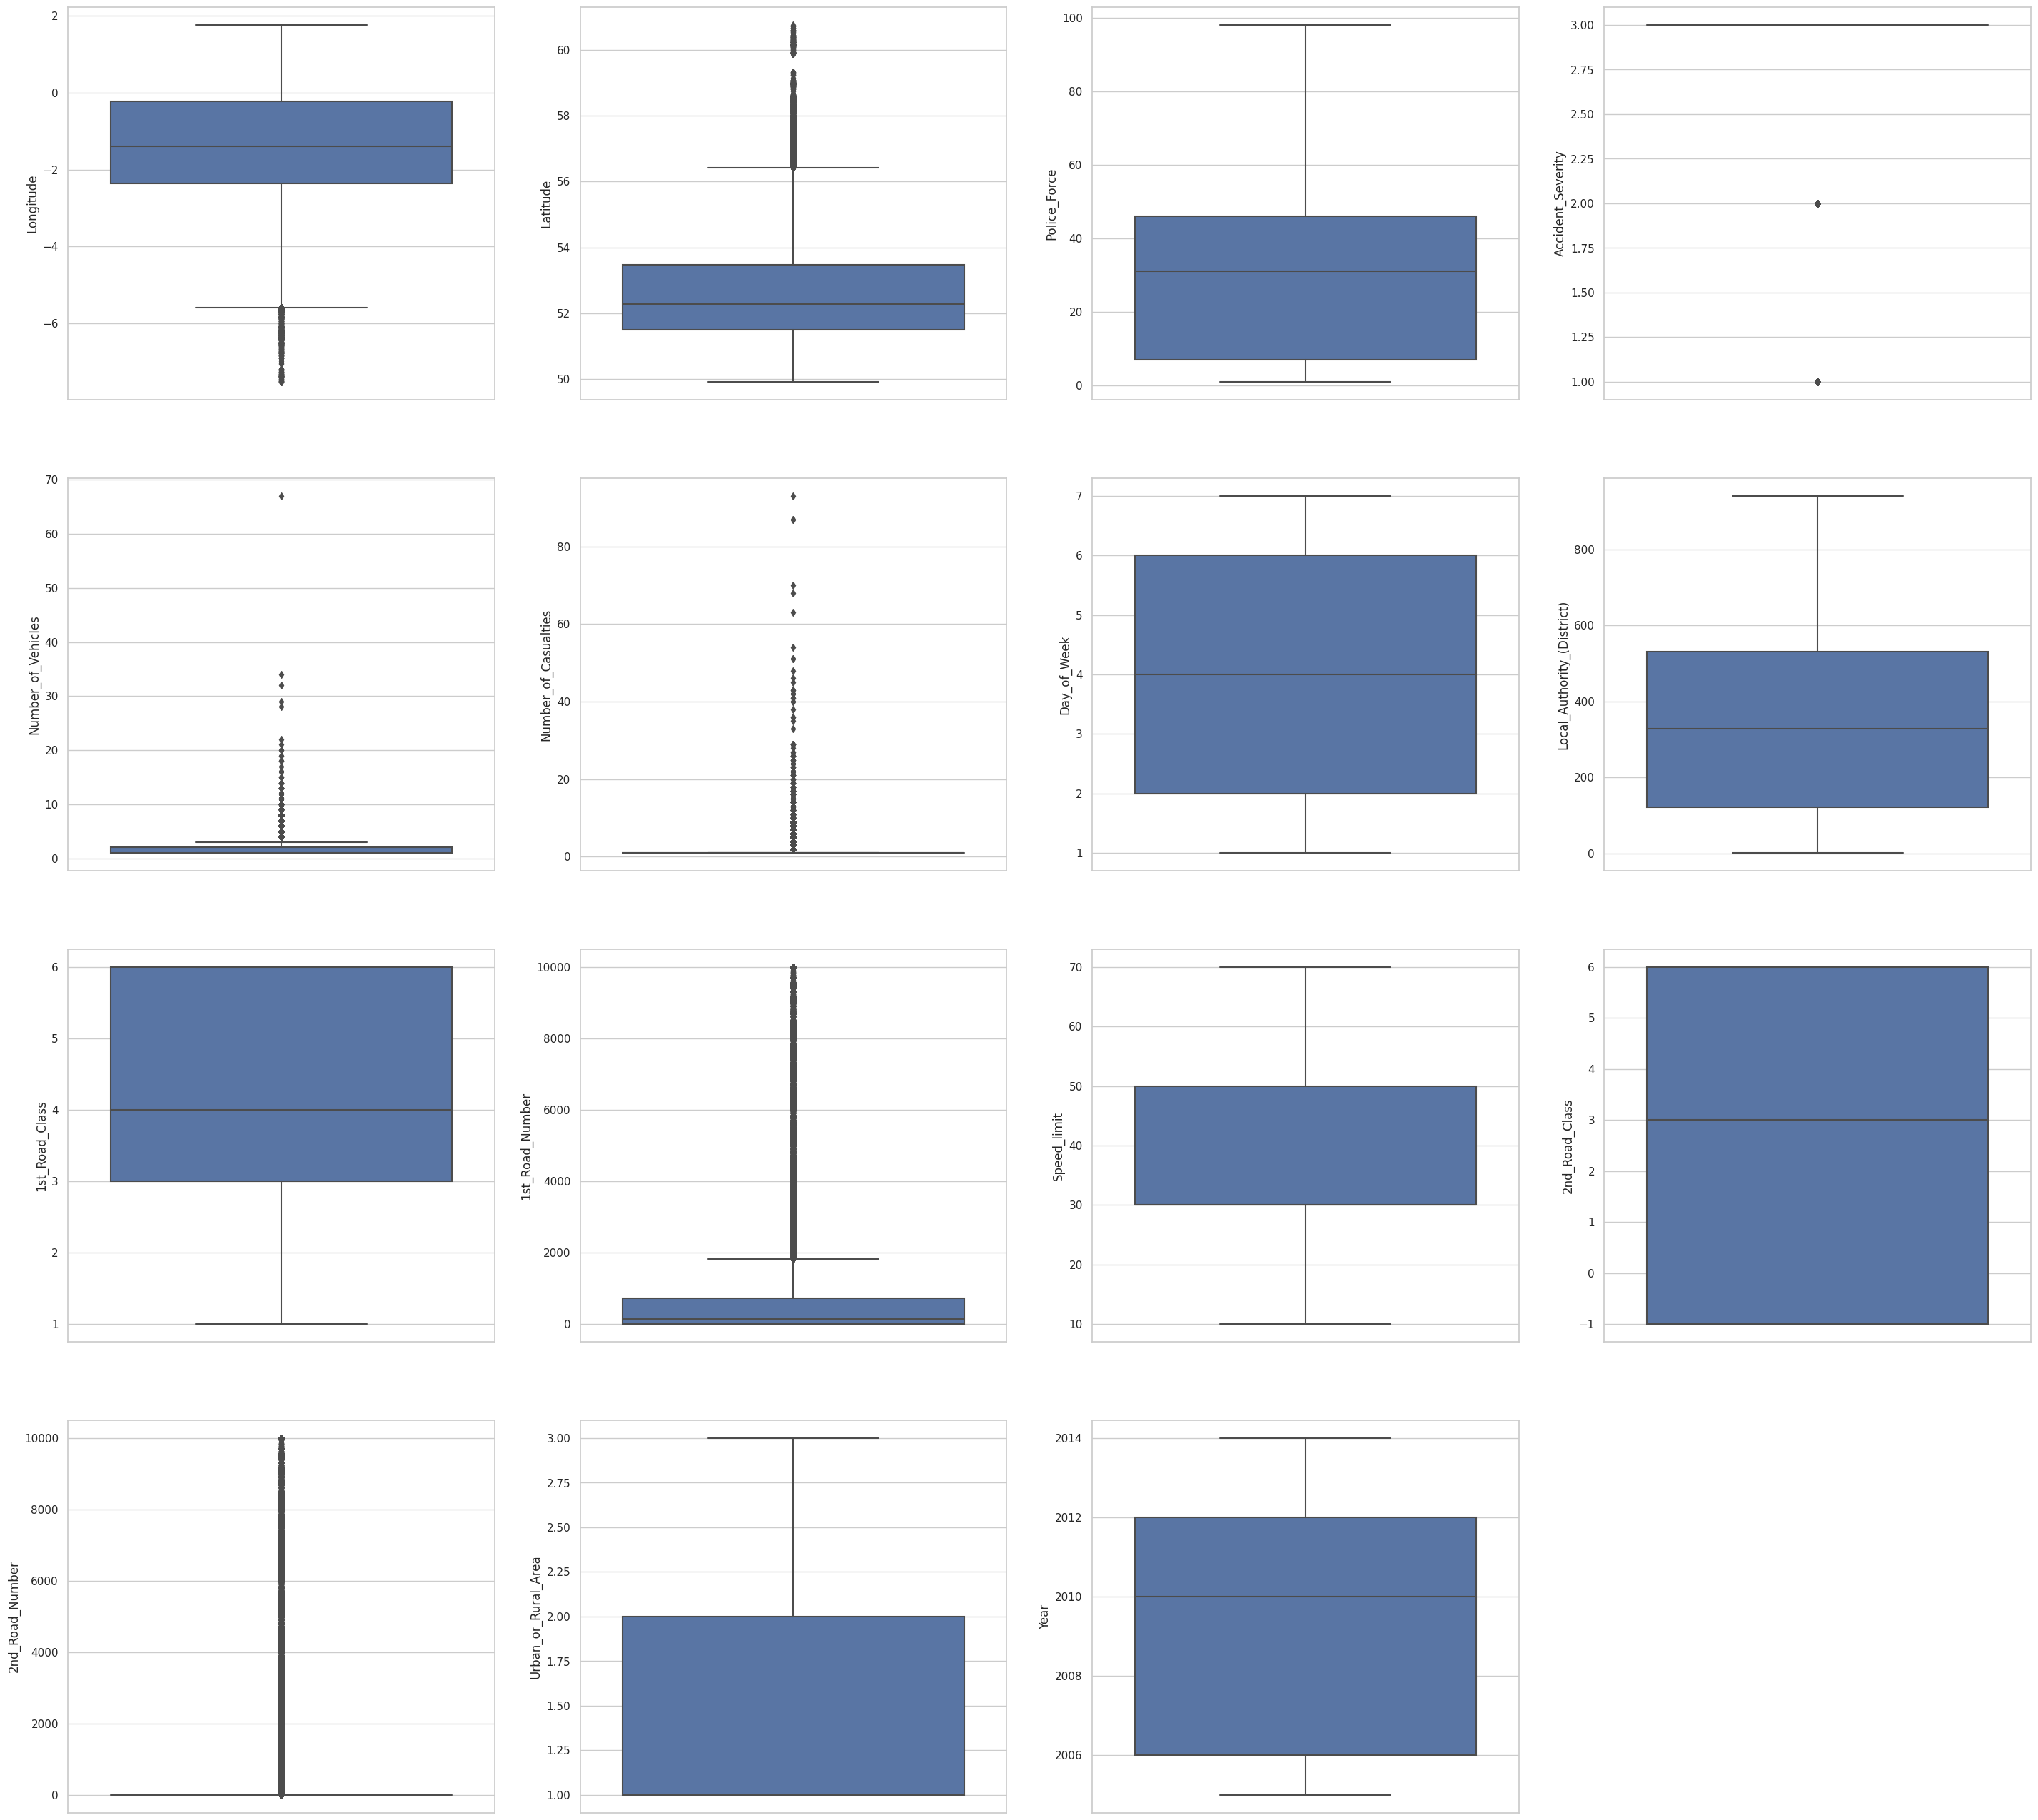

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [ ]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(right=1.5)

for plot in range(1, len(num_cols)+1):
    plt.subplot(6, 4, plot)
    sns.boxplot(y=df[num_cols[plot-1]])

plt.show()
%time

**Assessing the distribution, normality, and presence of outliers in the data**

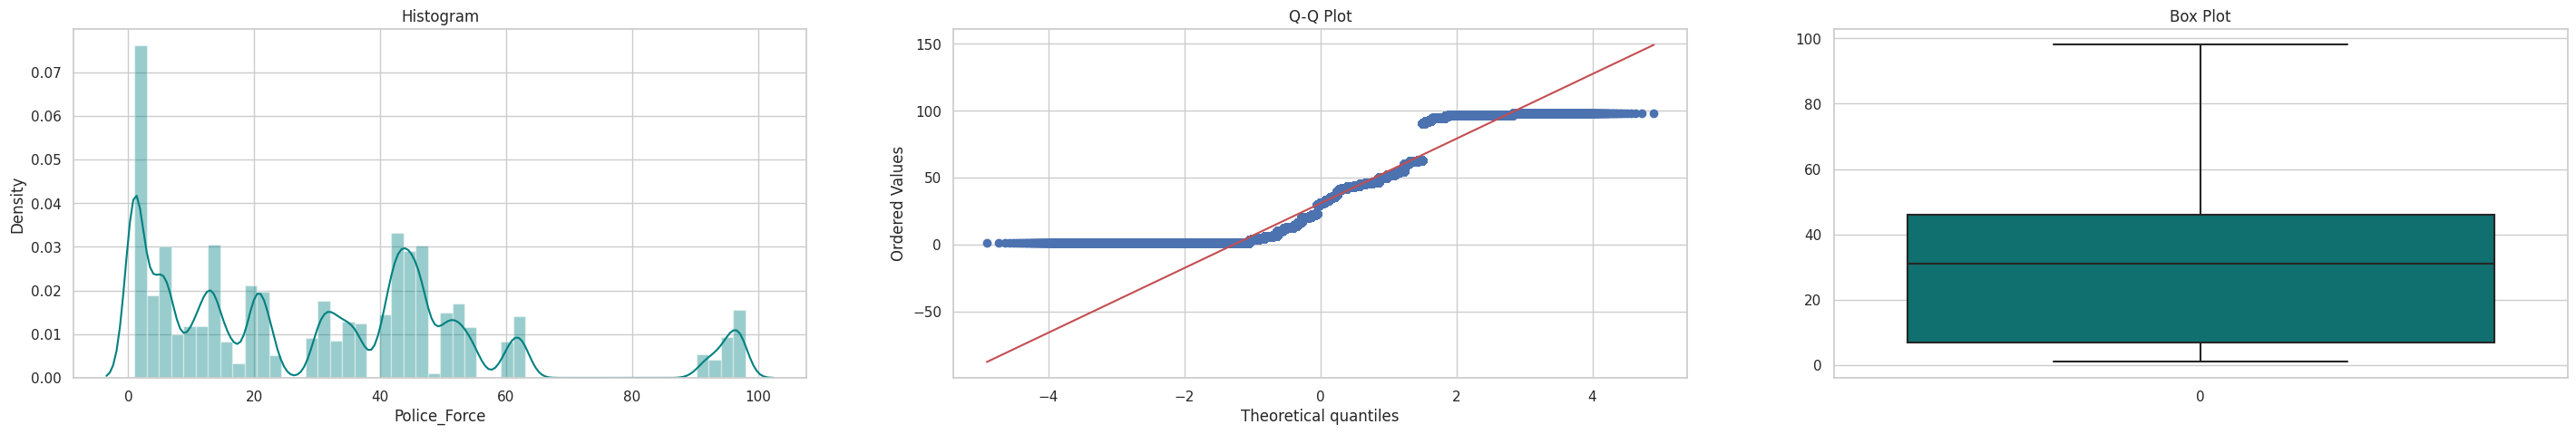

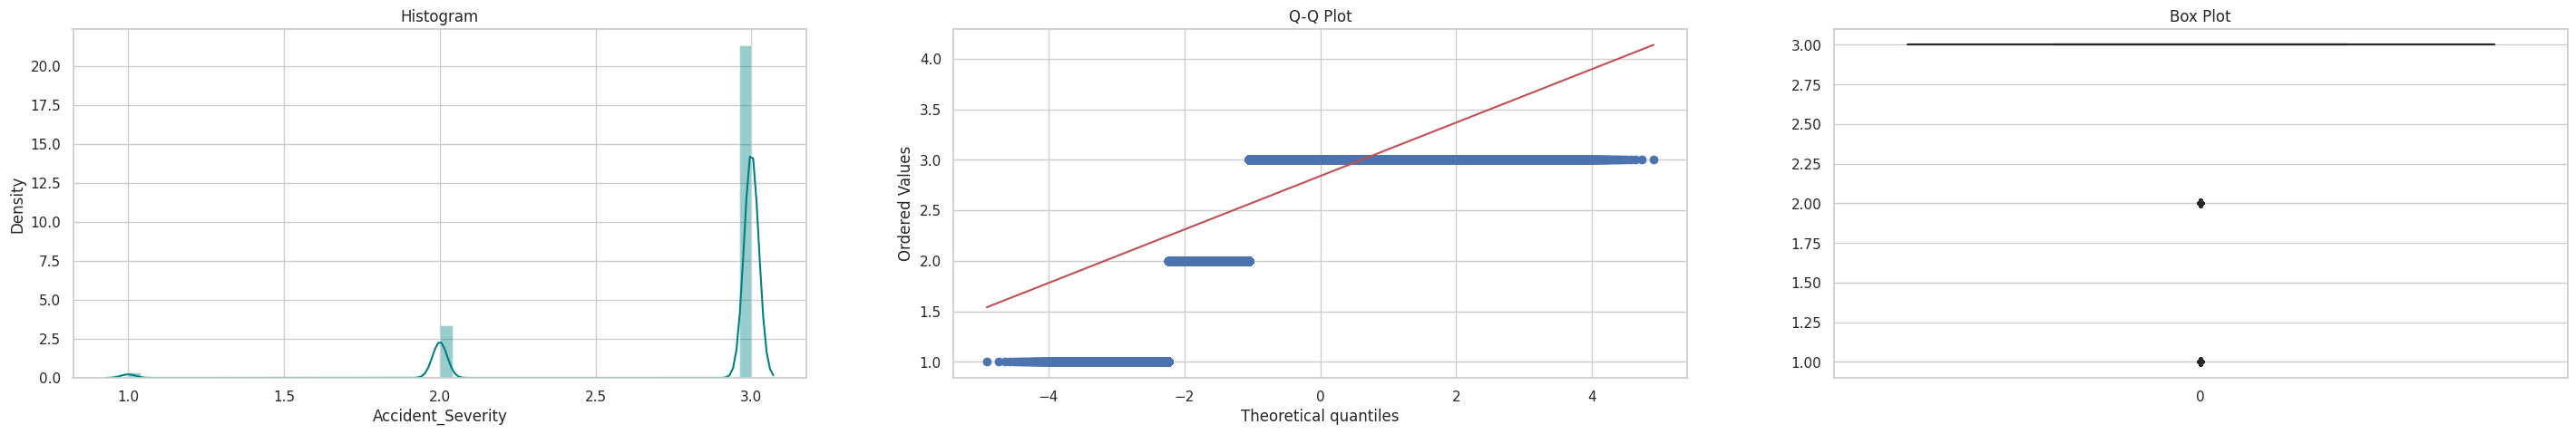

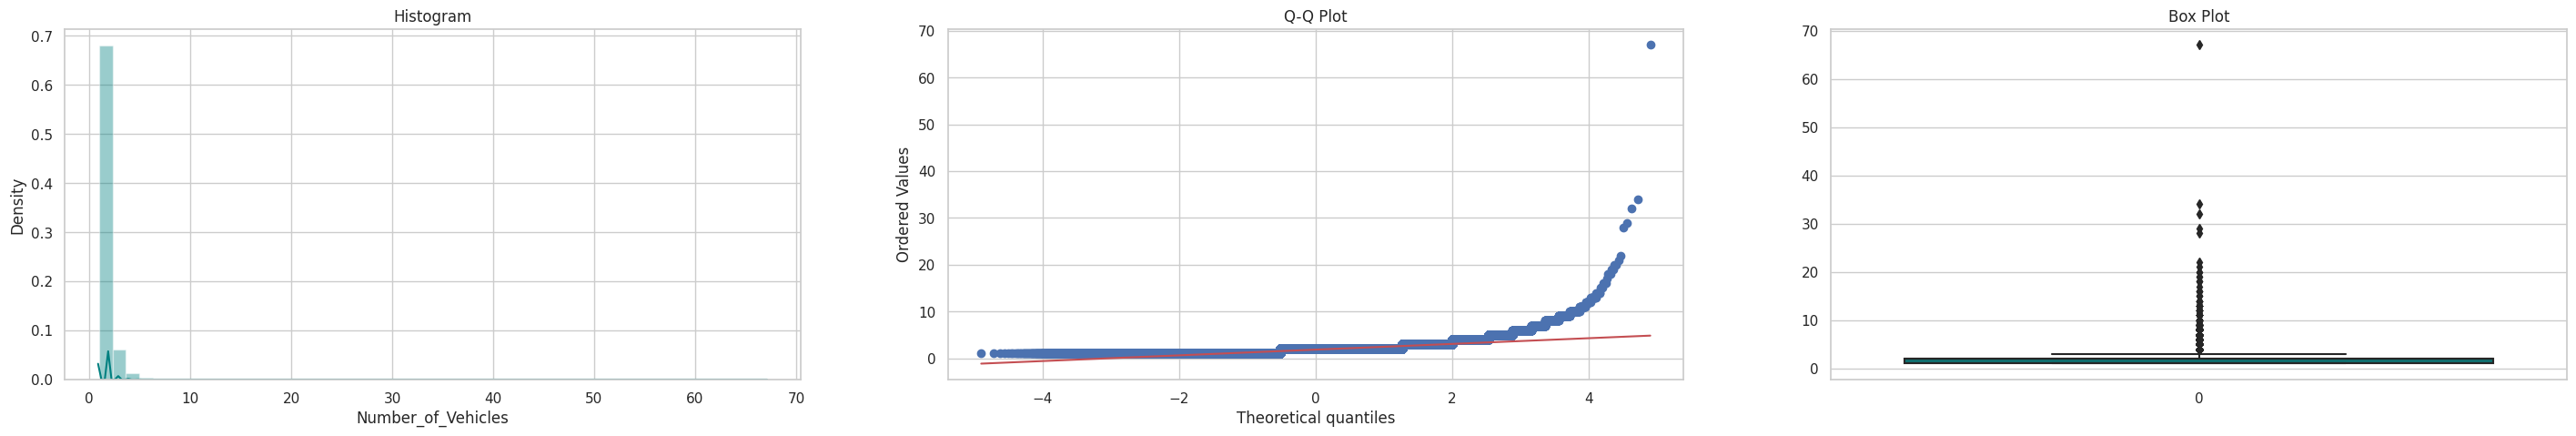

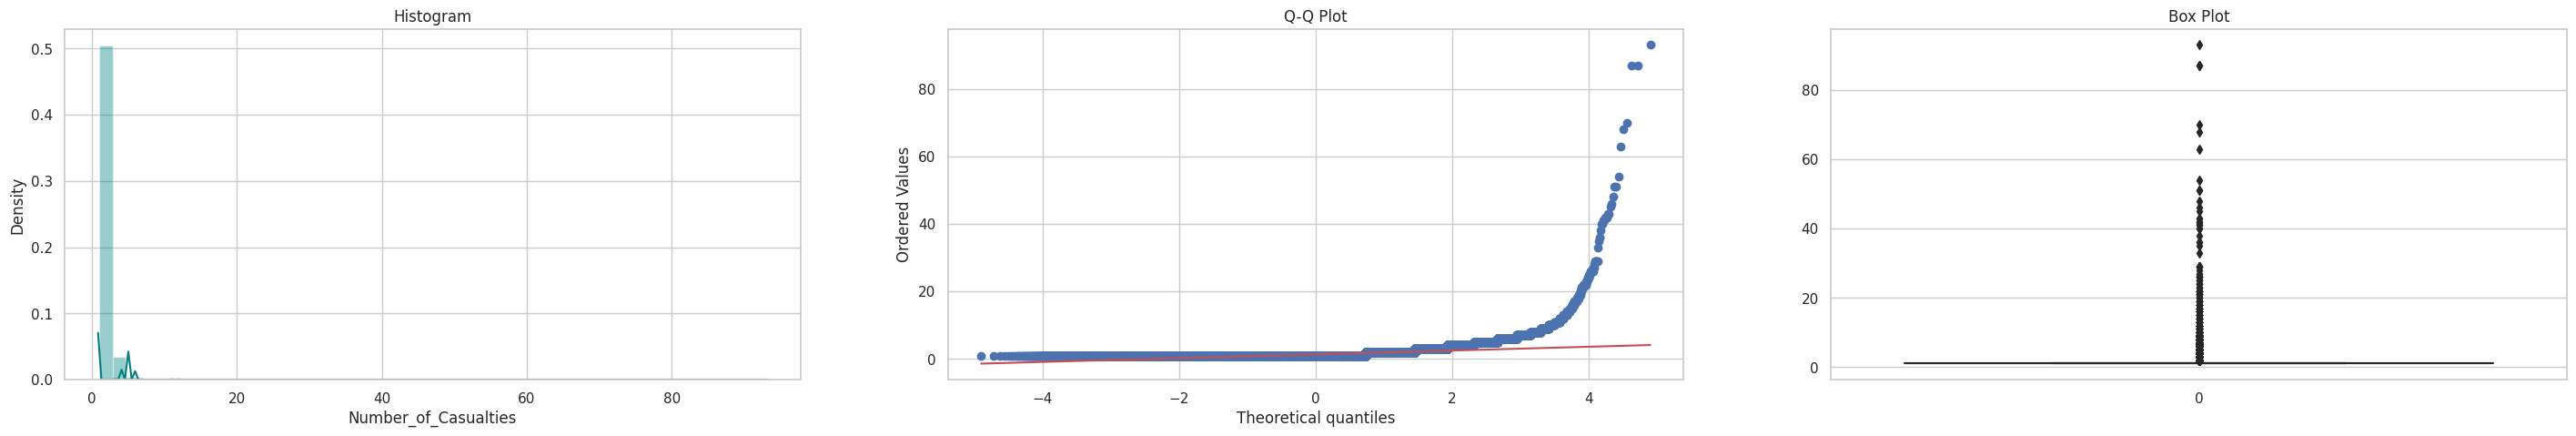

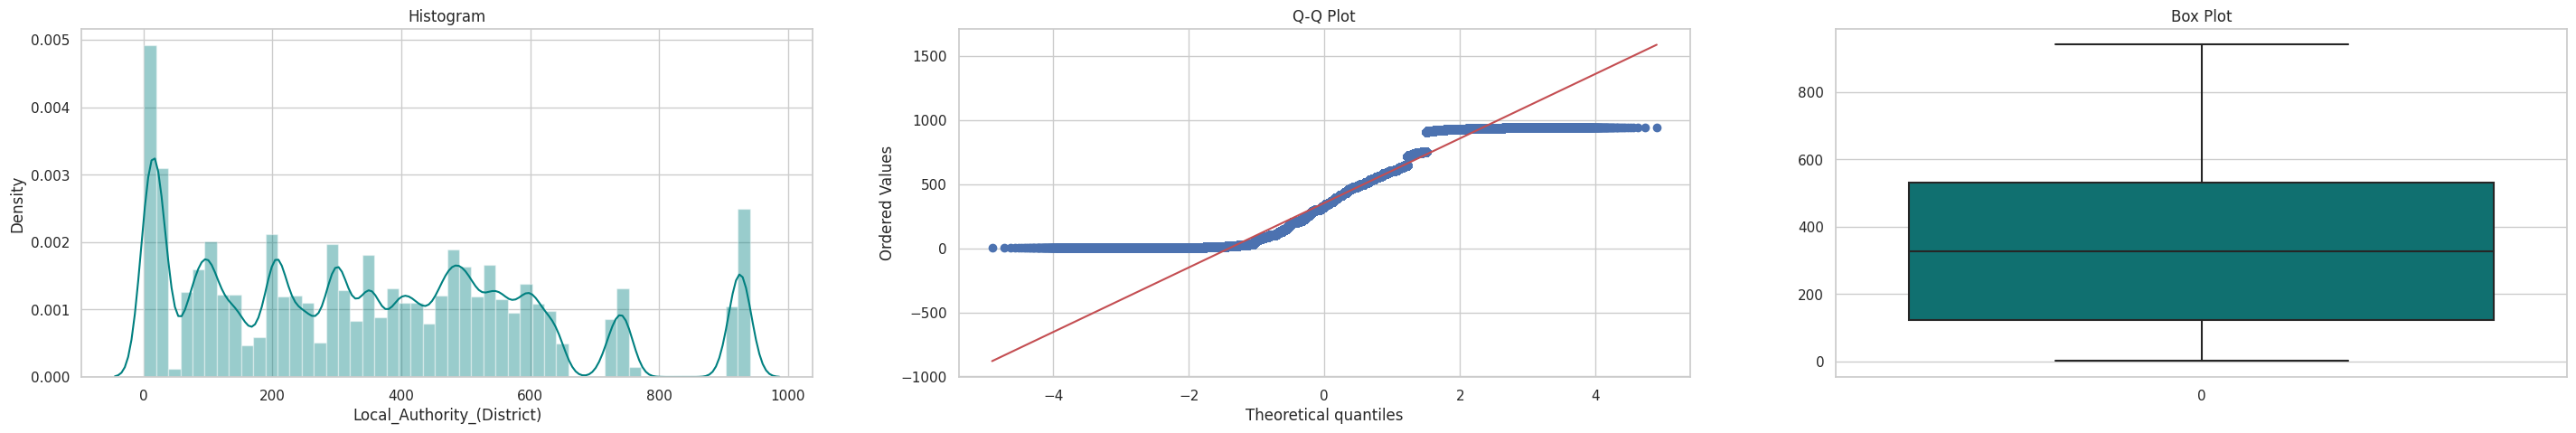

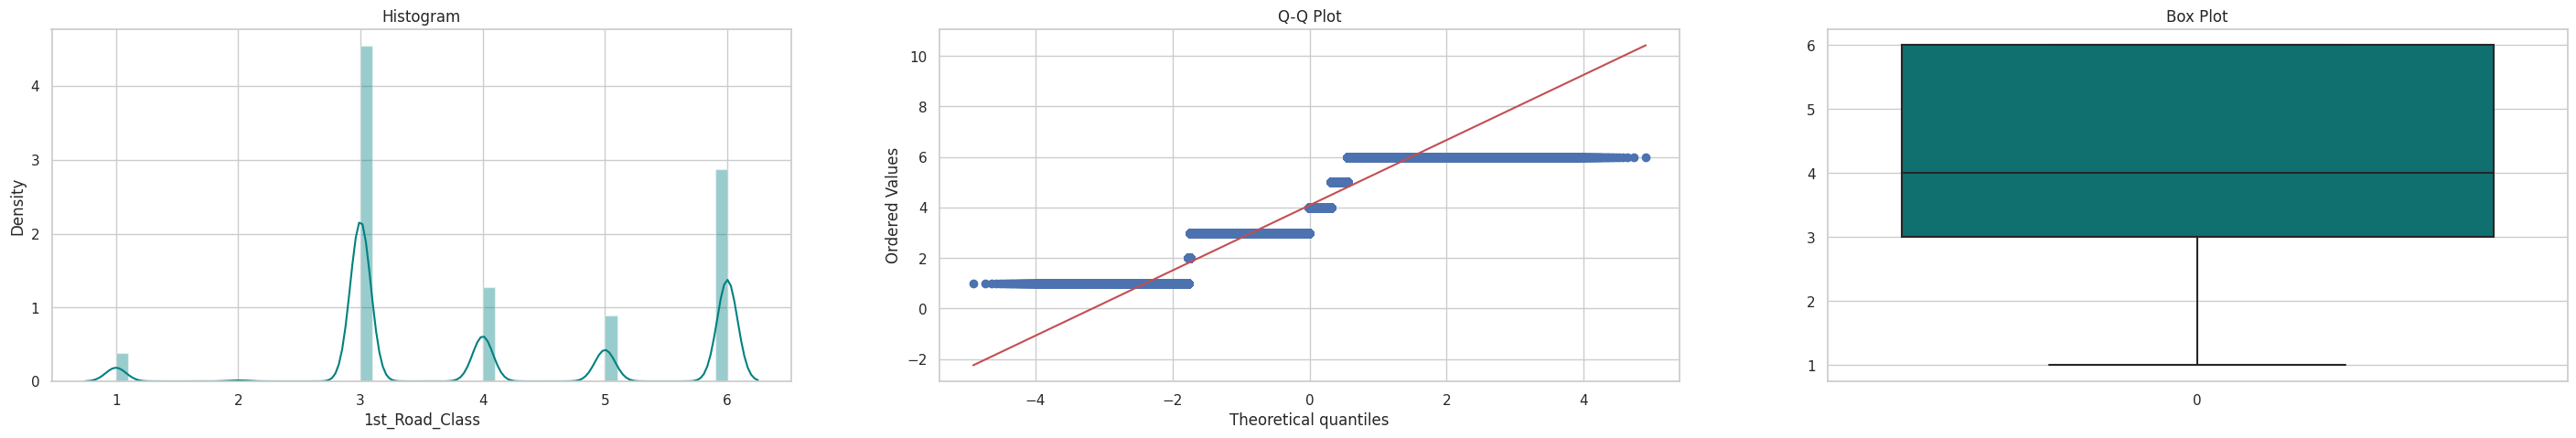

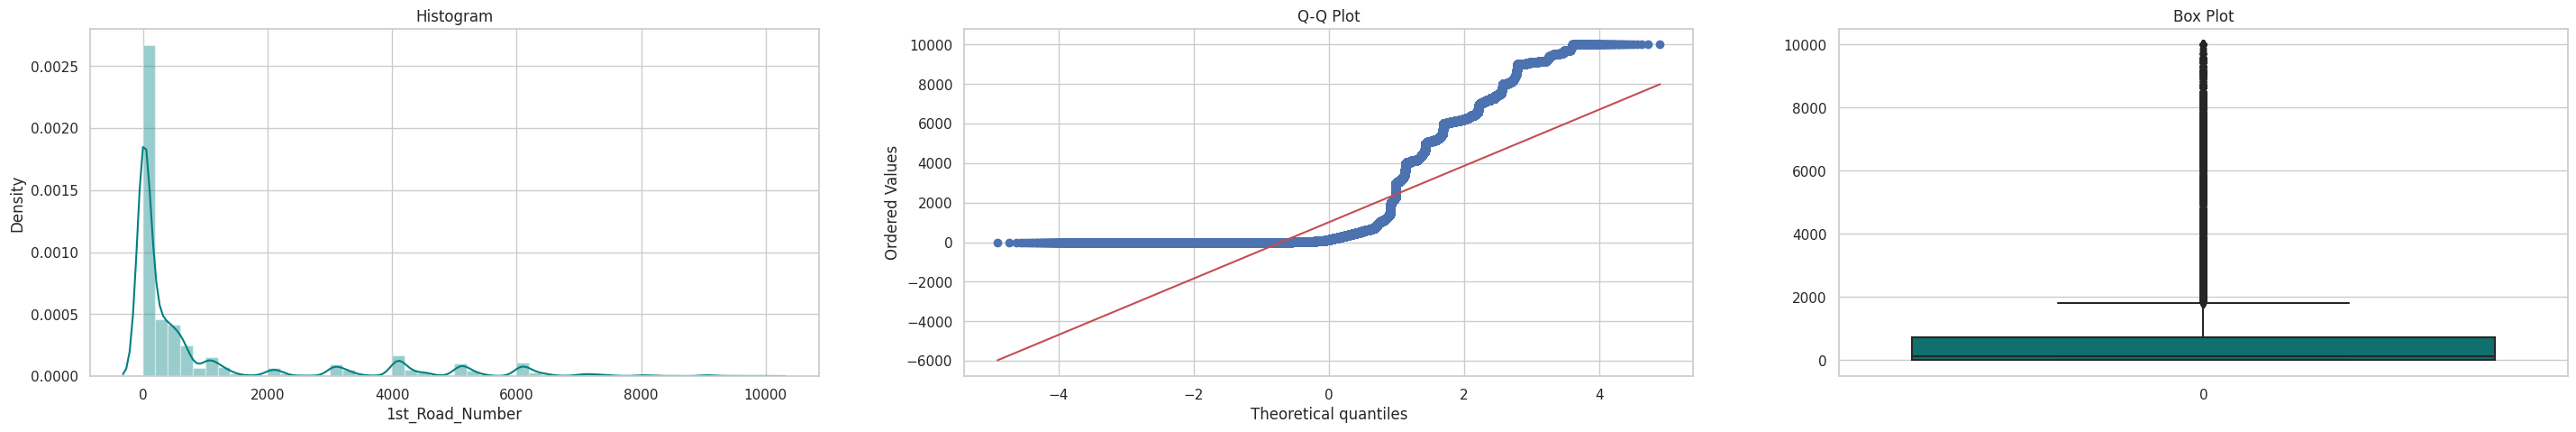

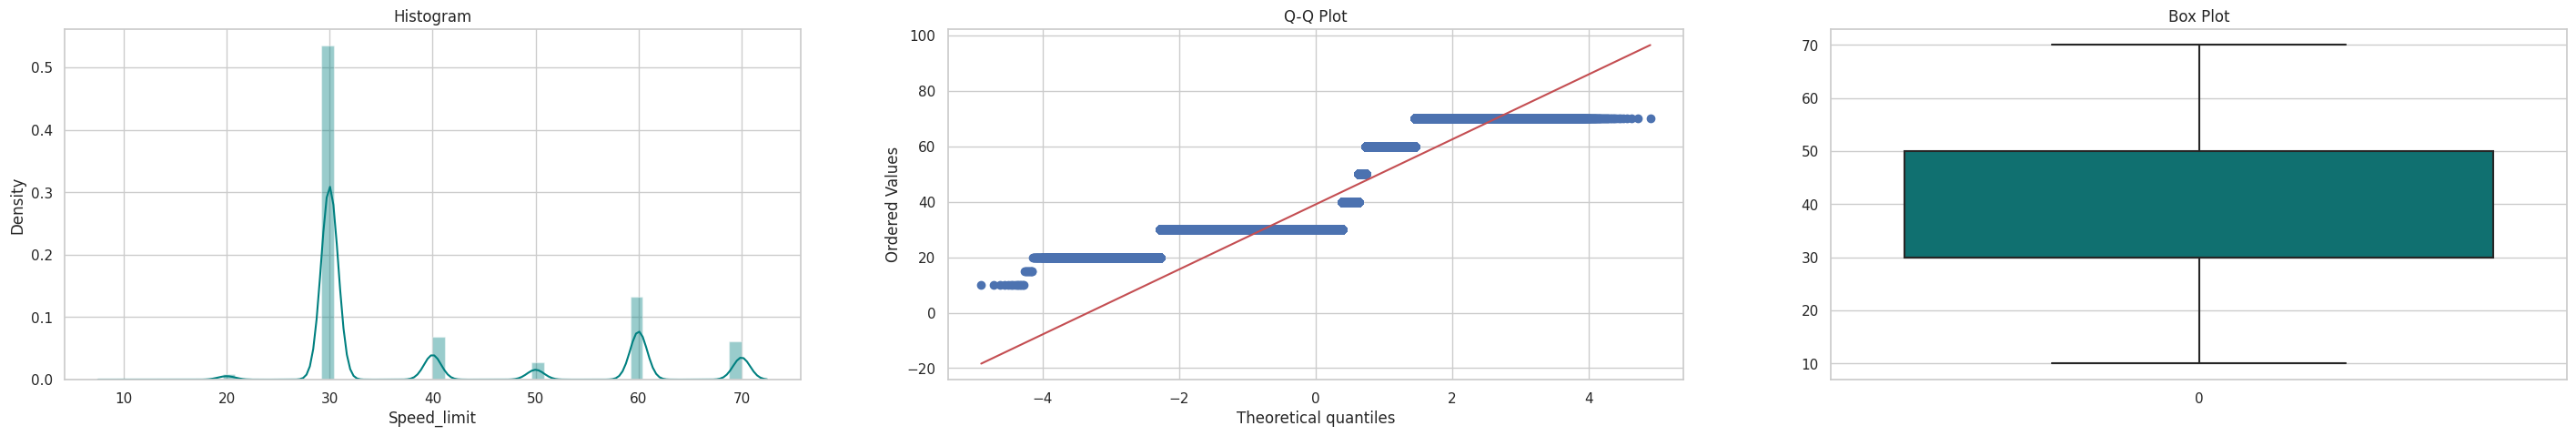

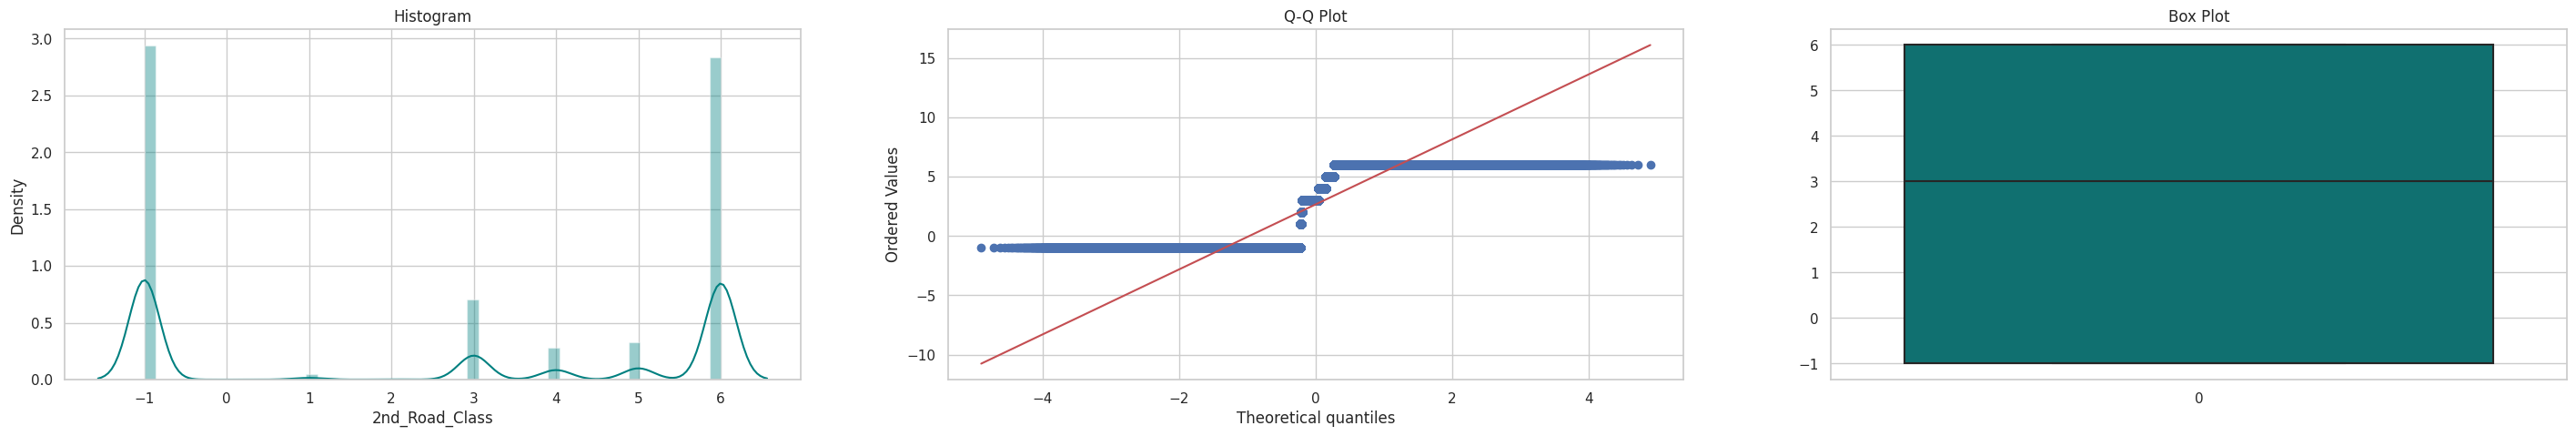

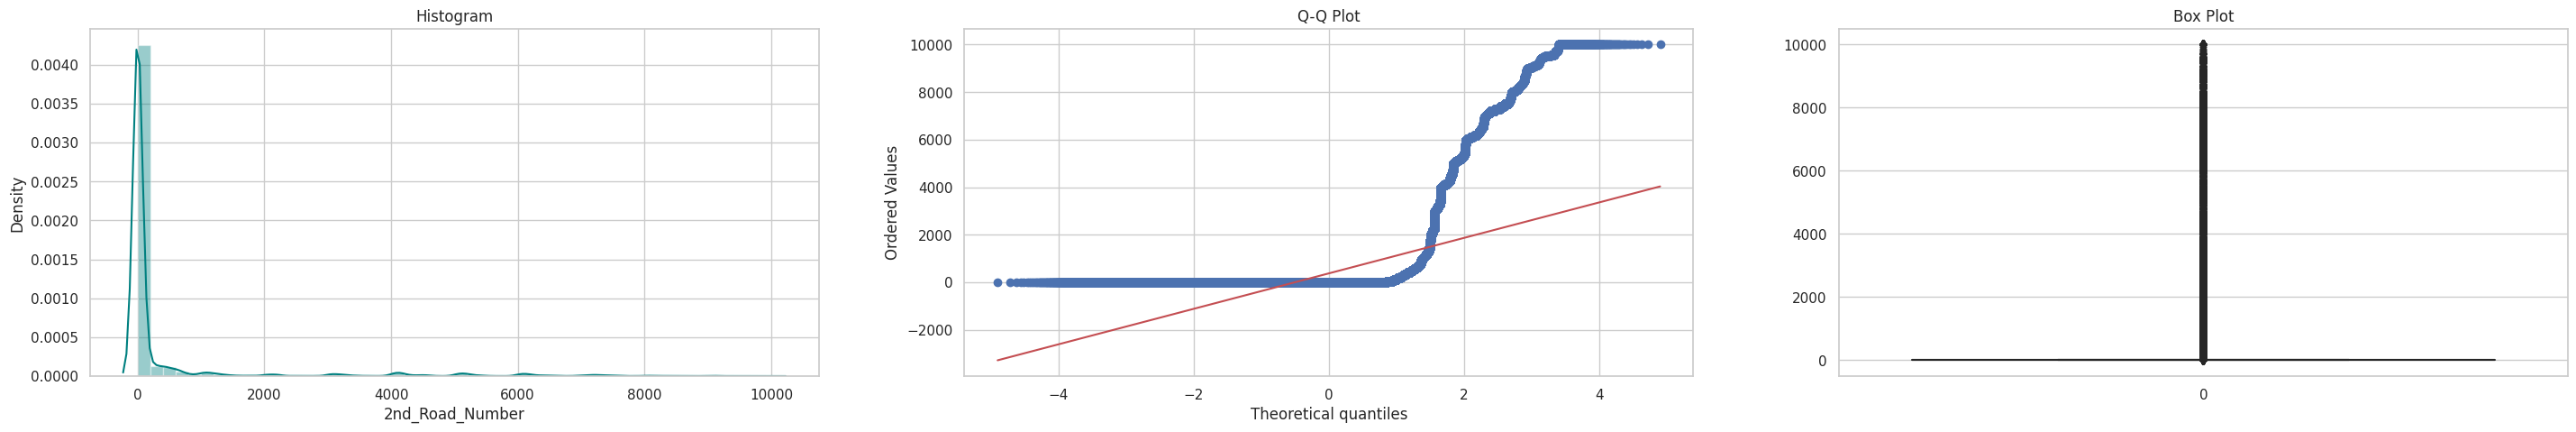

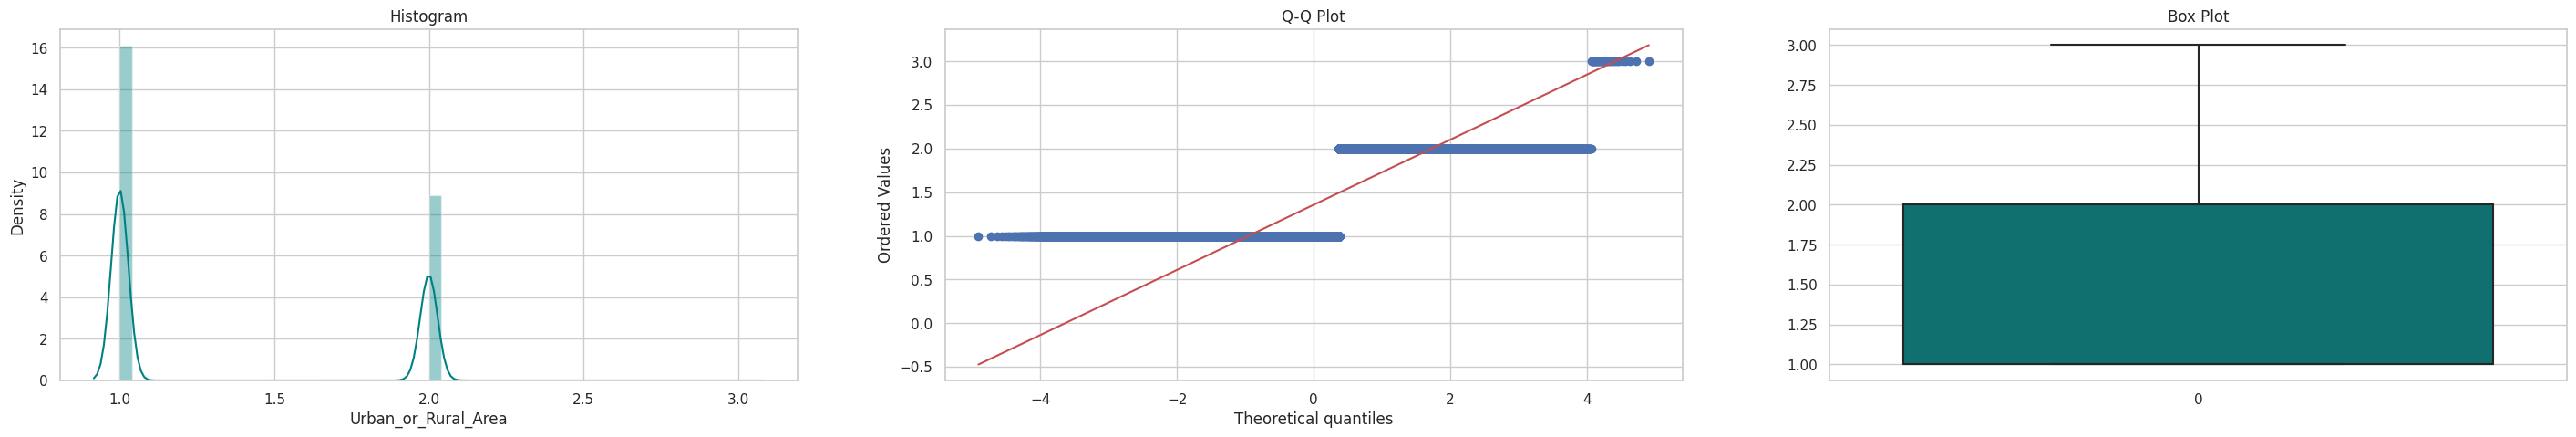

In [ ]:
import scipy.stats as stats
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(20, 5))
    fig.subplots_adjust(right=1.5)

    plt.subplot(1, 3, 1)
    sns.distplot(data[col], kde=True, color='teal')
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')

    plt.subplot(1, 3, 3)
    sns.boxplot(data[col],color='teal')
    plt.title('Box Plot')
    plt.show()

dist_lst = ['Police_Force', 'Accident_Severity',
            'Number_of_Vehicles', 'Number_of_Casualties',
            'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
            'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
            'Urban_or_Rural_Area']

for col in dist_lst:
    diagnostic_plot(df, col)

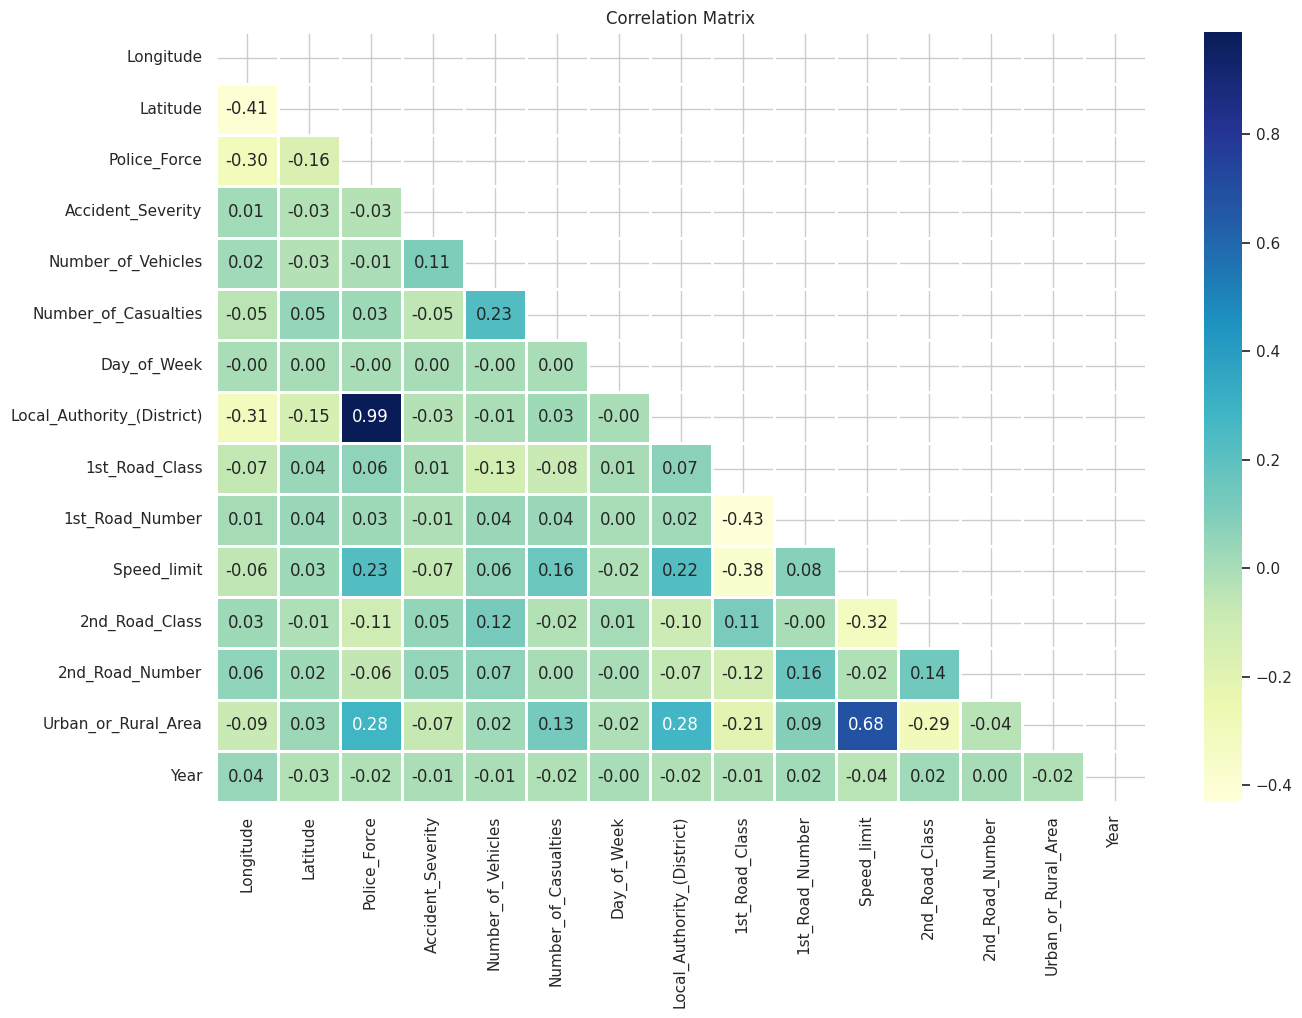

In [ ]:
plt.figure(figsize = (15,10))
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

In [ ]:
def get_corr(data, threshold):
    corr_col = set()
    cormat = data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i, j])>threshold:
                col_name = cormat.columns[i]
                corr_col.add(col_name)
    return corr_col

corr_features = get_corr(df, 0.80)
print(corr_features)

{'Local_Authority_(District)'}


In [ ]:
df.drop(columns=['Local_Authority_(District)'],
        axis=1, inplace=True)

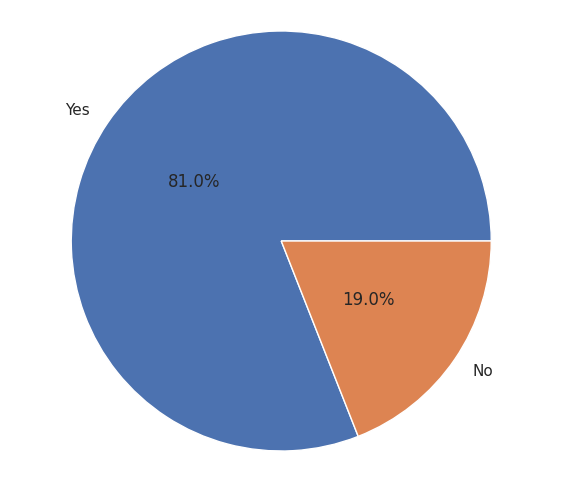

In [ ]:
def pie_chart(data, col):

  x = data[col].value_counts().values
  plt.figure(figsize=(7, 6))
  plt.pie(x, center=(0, 0), radius=1.5, labels=data[col].unique(),
          autopct='%1.1f%%', pctdistance=0.5)
  plt.axis('equal')
  plt.show()

pie_lst = ['Did_Police_Officer_Attend_Scene_of_Accident']
for col in pie_lst:
  pie_chart(df, col)

In [ ]:
df.sample(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
1010273,2.01147E+12,-0.16,50.90,47,2,1,1,2011-11-21,2,2023-12-13 09:10:00,3,273,Single carriageway,60,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,2011
171008,2.01E+12,-2.16,51.99,53,3,1,1,2005-01-06,4,2023-12-13 12:15:00,3,38,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,No,2005
902923,201101TA00075,-0.39,51.43,1,2,2,1,2011-08-02,3,2023-12-13 08:01:00,3,316,Dual carriageway,40,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2011
780568,2.01012E+12,-0.24,54.15,12,3,2,1,2010-03-04,7,2023-12-13 15:30:00,6,6,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,2010
583277,200901RG40091,0.00,51.48,1,3,2,1,2009-01-26,2,2023-12-13 22:30:00,3,206,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2009


In [ ]:
df['Urban_or_Rural_Area'].value_counts()

1    945654
2    524046
3        35
Name: Urban_or_Rural_Area, dtype: int64

In [ ]:
df['Urban_or_Rural_Area'].replace(3, 1, inplace=True)

In [ ]:
df['Accident_Severity'].value_counts()

3    1251820
2     198876
1      19039
Name: Accident_Severity, dtype: int64

In [ ]:
dt1 = df.groupby('Date')['Accident_Index'].count()\
.reset_index()\
.rename(columns={'Accident_Index':'No. of Accidents'})

fig = px.line(dt1, x='Date', y='No. of Accidents',
              labels={'index': 'Date', 'value': 'No. of Accidents'})
fig.show()

The above code aggregates the count of accidents for each date and then visualizes it using a line plot. As, we can see from above, highest number of accidents occured in October, 2005.

In [ ]:
len(df['Accident_Index'].unique())
df.drop('Accident_Index',axis=1,inplace=True)

In [ ]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.19,51.49,1,2,1,1,2005-04-01,3,2023-12-13 17:42:00,3,3218,Single carriageway,30,None,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,-0.21,51.52,1,3,1,1,2005-05-01,4,2023-12-13 17:36:00,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,-0.21,51.53,1,3,2,1,2005-06-01,5,2023-12-13 00:15:00,5,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,-0.17,51.48,1,3,1,1,2005-07-01,6,2023-12-13 10:35:00,3,3220,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,-0.16,51.50,1,3,1,1,2005-10-01,2,2023-12-13 21:13:00,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005


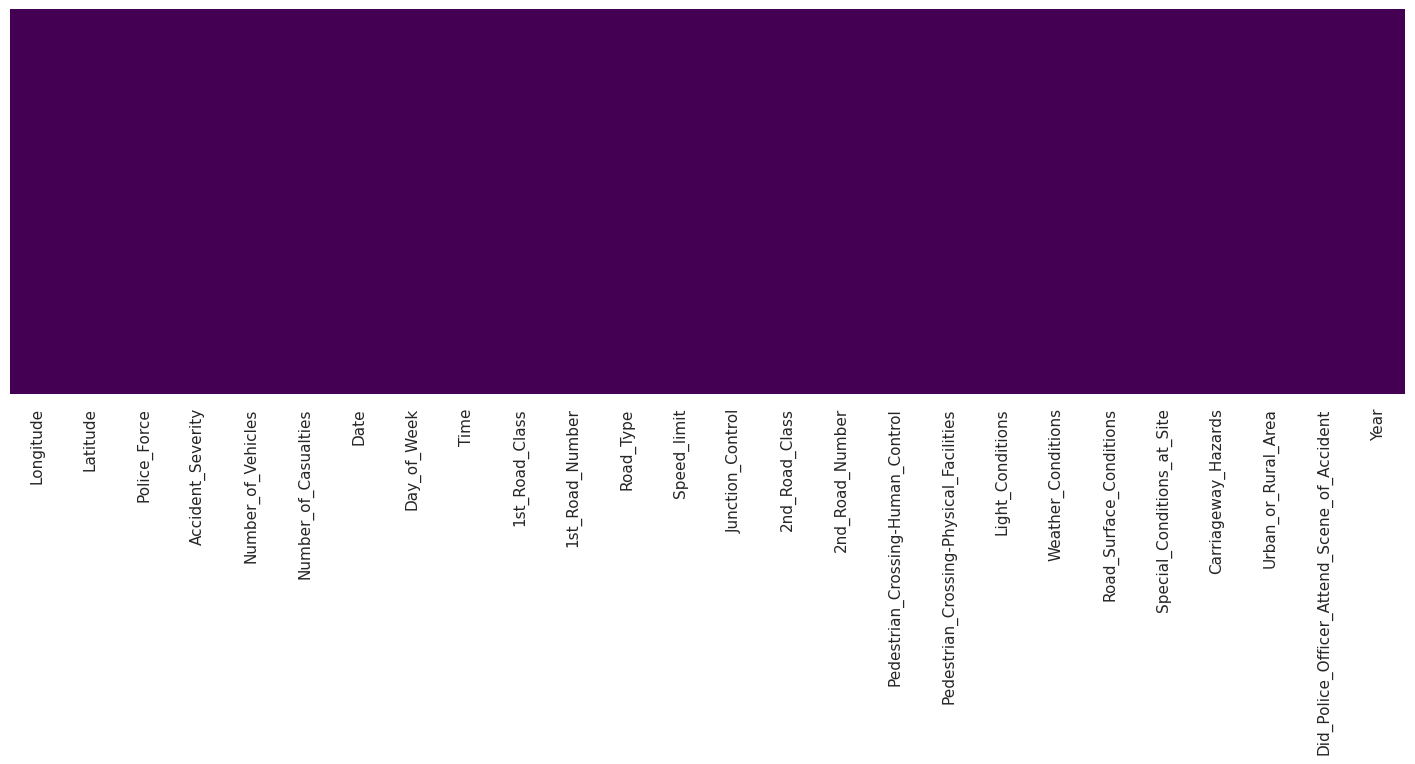

In [ ]:
plt.figure(figsize=(18, 5))
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

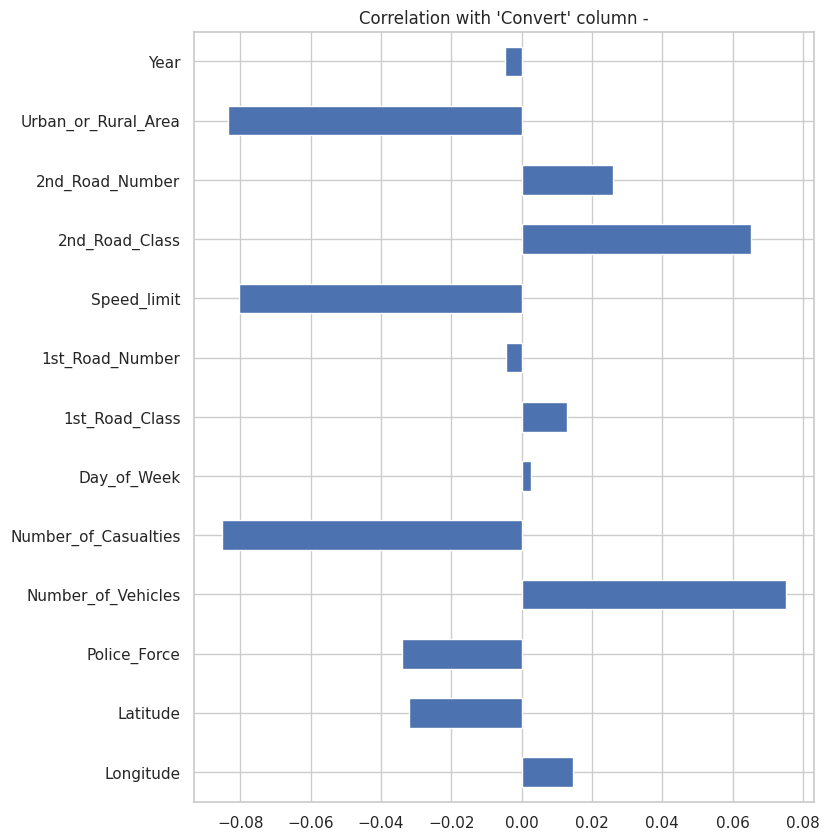

In [ ]:
X = df.drop(columns=['Accident_Severity'], axis=1)

plt.figure(figsize=(8, 10))
X.corrwith(df['Accident_Severity']).plot(kind='barh',
                               title="Correlation with 'Convert' column -")
plt.show()

In [ ]:
cat_cols=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_cols)

['Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident']


In [ ]:
for feature in cat_cols:
    print(f'The {feature} has following number of {len(df[feature].unique())}')

The Road_Type has following number of 6
The Junction_Control has following number of 5
The Pedestrian_Crossing-Human_Control has following number of 3
The Pedestrian_Crossing-Physical_Facilities has following number of 6
The Light_Conditions has following number of 5
The Weather_Conditions has following number of 9
The Road_Surface_Conditions has following number of 6
The Special_Conditions_at_Site has following number of 8
The Carriageway_Hazards has following number of 6
The Did_Police_Officer_Attend_Scene_of_Accident has following number of 2


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

for feature in cat_cols:
    df[feature]=labelencoder.fit_transform(df[feature])

Label Encoder converts categorical data into numerical values. The conversion is necessary for algorithms that require numerical values

In [ ]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.19,51.49,1,2,1,1,2005-04-01,3,2023-12-13 17:42:00,3,3218,3,30,3,-1,0,2,4,4,5,5,3,3,1,1,2005
1,-0.21,51.52,1,3,1,1,2005-05-01,4,2023-12-13 17:36:00,4,450,0,30,1,5,0,2,3,2,1,0,3,3,1,1,2005
2,-0.21,51.53,1,3,2,1,2005-06-01,5,2023-12-13 00:15:00,5,0,3,30,3,-1,0,2,2,2,1,0,3,3,1,1,2005
3,-0.17,51.48,1,3,1,1,2005-07-01,6,2023-12-13 10:35:00,3,3220,3,30,3,-1,0,2,2,4,1,0,3,3,1,1,2005
4,-0.16,51.50,1,3,1,1,2005-10-01,2,2023-12-13 21:13:00,6,0,3,30,3,-1,0,2,2,1,1,5,3,3,1,1,2005


In [ ]:
df.drop('Year',axis=1,inplace=True)
df["day"] = df['Date'].map(lambda x: x.day)
df["month"] = df['Date'].map(lambda x: x.month)
df["year"] = df['Date'].map(lambda x: x.year)
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,day,month,year
0,-0.19,51.49,1,2,1,1,2005-04-01,3,2023-12-13 17:42:00,3,3218,3,30,3,-1,0,2,4,4,5,5,3,3,1,1,1,4,2005
1,-0.21,51.52,1,3,1,1,2005-05-01,4,2023-12-13 17:36:00,4,450,0,30,1,5,0,2,3,2,1,0,3,3,1,1,1,5,2005
2,-0.21,51.53,1,3,2,1,2005-06-01,5,2023-12-13 00:15:00,5,0,3,30,3,-1,0,2,2,2,1,0,3,3,1,1,1,6,2005
3,-0.17,51.48,1,3,1,1,2005-07-01,6,2023-12-13 10:35:00,3,3220,3,30,3,-1,0,2,2,4,1,0,3,3,1,1,1,7,2005
4,-0.16,51.50,1,3,1,1,2005-10-01,2,2023-12-13 21:13:00,6,0,3,30,3,-1,0,2,2,1,1,5,3,3,1,1,1,10,2005


In [ ]:
df.drop("Date",axis=1,inplace=True)
df.drop("Time",axis=1,inplace=True)

In [ ]:
df['Accident_Severity']=df['Accident_Severity'].map({1:0,2:1,3:2})

In [ ]:
dfnew=df[['Latitude','Longitude','Weather_Conditions','Light_Conditions','Road_Surface_Conditions','day','month','1st_Road_Number','year','Day_of_Week','Accident_Severity']]

In [ ]:
df.columns

Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'day', 'month', 'year'],
      dtype='object')

 **Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
features = [feature for feature in dfnew.columns if feature!='Accident_Severity']
x = dfnew.iloc[0:50000, :-1]
y = dfnew.iloc[0:50000,[-1]]
x = StandardScaler().fit_transform(x)

Standardization is a common preprocessing step in machine learning that transforms the data to have a mean of zero and a standard deviation of one. This process ensures that the features are on a similar scale which can be important for certain algorithms.

**Addressing Class Imbalance**

In [ ]:
%%time
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split


from imblearn.over_sampling import SMOTE
oversample = RandomOverSampler()
x, y = oversample.fit_resample(x, y)

CPU times: user 88.9 ms, sys: 29 ms, total: 118 ms
Wall time: 323 ms


**Splitting the Dataset**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# ExtraTrees Classifier



*   The Extra Trees Classifier is an ensemble learning method that belongs to the family of decision tree-based models.
*    It is an extension of the Random Forest algorithm and shares similarities with it.
* It is robust to noisy or irrelevant features, and can train faster than other models



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)

ExtraTreesClassifier()

In [ ]:
preds=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
clf_score=accuracy_score(y_test,preds)
print(clf_score)

0.9874175234003376


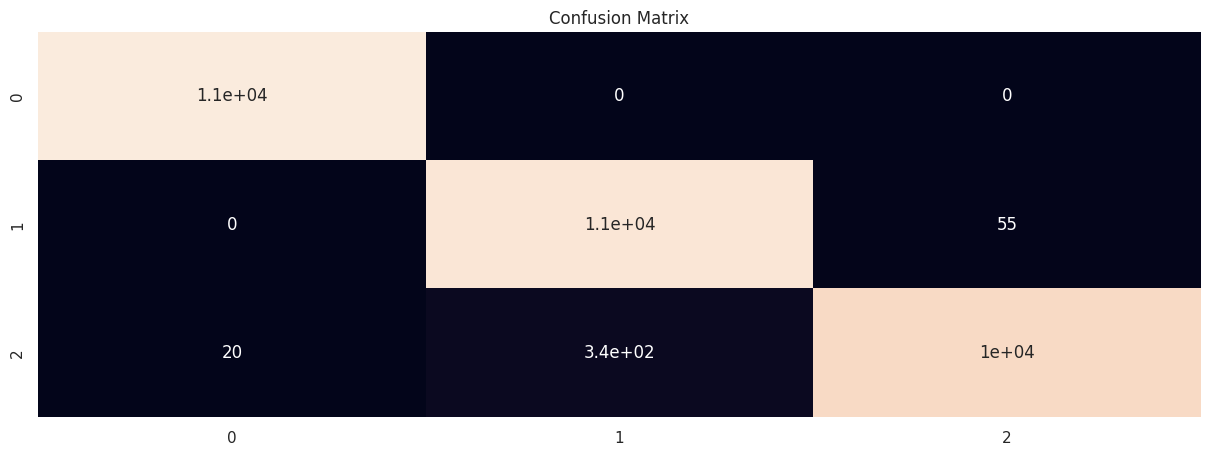

In [ ]:
fig = plt.figure(figsize=(15,5))
conmat = confusion_matrix(y_test, preds)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10949
           1       0.97      0.99      0.98     10840
           2       0.99      0.97      0.98     10796

    accuracy                           0.99     32585
   macro avg       0.99      0.99      0.99     32585
weighted avg       0.99      0.99      0.99     32585



# Logistic Regression





*   
Logistic Regression is a statistical method used for binary classification.
*   Despite its name, it is a classification algorithm rather than a regression algorithm.
* It models the probability that an instance belongs to a particular category.





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [ ]:
check = df.copy()
severity = check['Accident_Severity']
severity = pd.DataFrame(severity, columns = ['Accident_Severity'])

In [ ]:
%%time
model = LogisticRegression(solver = 'lbfgs', max_iter = 100)
score = cross_val_score(model, check, severity, cv = 5)
score.mean()

CPU times: user 3min 15s, sys: 1min 33s, total: 4min 49s
Wall time: 3min 12s


0.8517338159600201

# Random Forest Classifier



*   The Random Forest Classifier is an ensemble learning algorithm that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or the mean prediction (regression) of the individual trees.
*   It belongs to the family of tree-based models and is known for its robustness and high predictive accuracy.



In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(x_train, y_train)


CPU times: user 12 s, sys: 44.8 ms, total: 12 s
Wall time: 12 s


RandomForestClassifier(random_state=42)

In [ ]:
rf_score = rf_classifier.score(x_test,y_test)
rf_score

0.9873254564983889

# XGBoost Classifier



*   XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm known for its efficiency and performance in various types of predictive modeling tasks.
*   It falls under the category of gradient boosting algorithms and is widely used for both classification and regression problems



In [ ]:
from xgboost import XGBClassifier

In [ ]:
%%time
XGB=XGBClassifier(objective="multi:softmax",n_estimators=300,colsample_bytree=0.9, subsample=0.9)
XGB.fit(x_train, y_train)


CPU times: user 15.3 s, sys: 74.8 ms, total: 15.4 s
Wall time: 9 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# Prediction
xgb_predict = XGB.predict(x_test)
XGB_score = accuracy_score(y_test, xgb_predict)
print("XGBoost Testing Accuracy: ", XGB_score)

XGBoost Testing Accuracy:  0.8981740064446831


In [ ]:
class_report2 = classification_report(y_test, xgb_predict)

print("Classification Report:\n", class_report2)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     10949
           1       0.82      0.90      0.86     10840
           2       0.89      0.79      0.84     10796

    accuracy                           0.90     32585
   macro avg       0.90      0.90      0.90     32585
weighted avg       0.90      0.90      0.90     32585



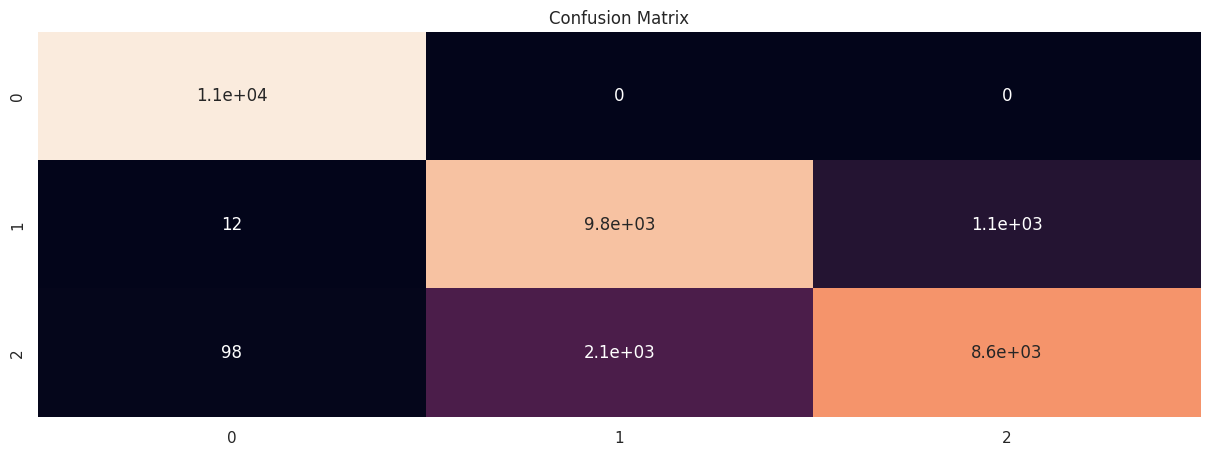

In [ ]:
fig = plt.figure(figsize=(15,5))
conmat = confusion_matrix(y_test, xgb_predict)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

# Decision Tree Classifier



*    Decision Trees work by recursively partitioning the dataset into subsets based on the values of input features.
*   The goal is to create a tree-like model where each internal node represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents the final predicted label or value.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)

# Train the model
tree.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on the test
tree_predict = tree.predict(x_test)

In [ ]:
# Evaluate the model
tree_accuracy = accuracy_score(y_test, tree_predict)
print("Accuracy:", tree_accuracy)

Accuracy: 0.9429185207917754


In [ ]:
class_report3 = classification_report(y_test, tree_predict)

print("Classification Report:\n", class_report3)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     10949
           1       0.87      1.00      0.93     10840
           2       0.99      0.83      0.91     10796

    accuracy                           0.94     32585
   macro avg       0.95      0.94      0.94     32585
weighted avg       0.95      0.94      0.94     32585



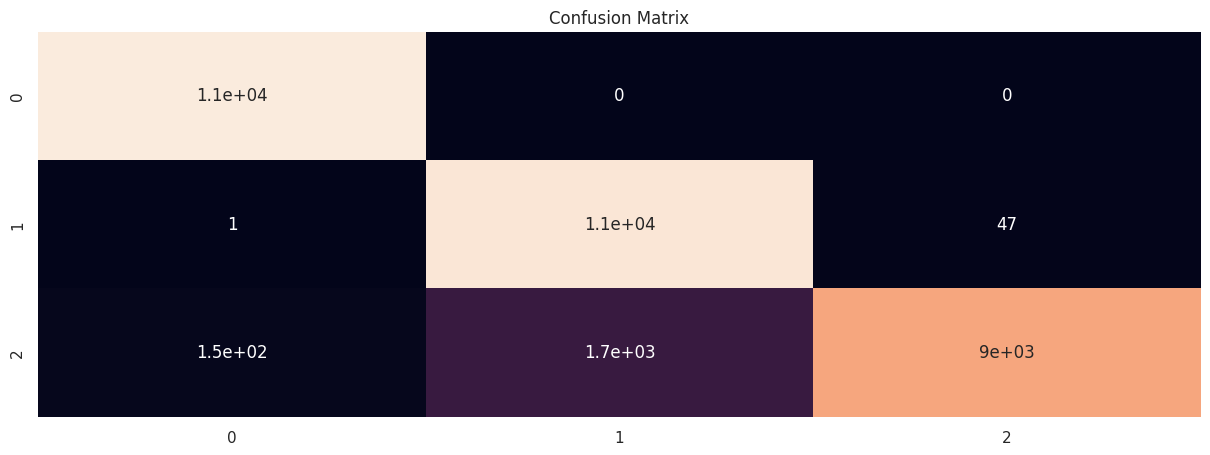

In [ ]:
fig = plt.figure(figsize=(15,5))
conmat = confusion_matrix(y_test, tree_predict)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

# Comparitive study of the different models used

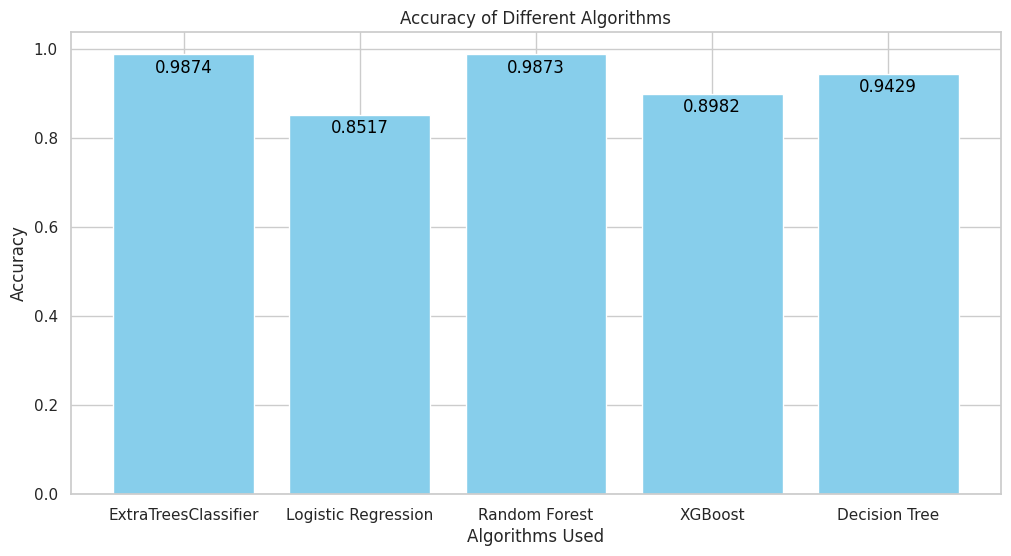

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['ExtraTreesClassifier', 'Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree']
values = [clf_score, score.mean(), rf_score, XGB_score, tree_accuracy]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(categories, values, color='skyblue')

# Adding labels to each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{value:.4f}', ha='center', va='bottom', color='black')

# Title and labels
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms Used')
plt.ylabel('Accuracy')

# Show plot
plt.show()
